In [1]:
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("Beer_Grouping.xlsx")
df.head(2)

,Name,Calories,Sodium,Alcohol,Cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43


In [3]:
# Standardize each columns before kmeans clustering
df.iloc[:,1:] = StandardScaler().fit_transform(df.iloc[:,1:])

In [4]:
# clustering can be done by using the numerical columns
sel_cols = ['Calories', 'Sodium', 'Alcohol', 'Cost']
kmeans = KMeans(n_clusters = 3, max_iter = 1000, n_init = 10, init = 'k-means++', random_state=123).fit(df[sel_cols])

In [5]:
df['cluster'] = kmeans.labels_
df['cluster'] = ['Cluster_' + str(x) for x in kmeans.labels_.tolist()]

In [6]:
#df.sort_values(by=['cluster'], axis = 0)

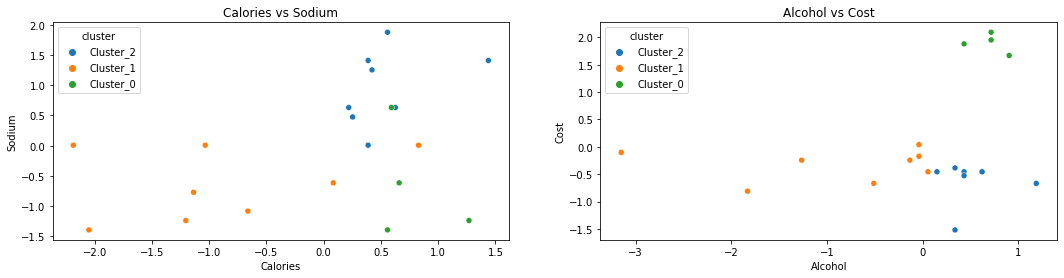

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,4), sharex=False, sharey=False)

# Visualize clusters
ax1.set_title('Calories vs Sodium')
sns.scatterplot(data=df, x='Calories', y='Sodium', hue='cluster', ax=ax1);

ax2.set_title('Alcohol vs Cost')
sns.scatterplot(data=df, x='Alcohol', y='Cost', hue='cluster', ax=ax2);

# Interpretation

We observe following clusters:

| Property | Cluster 0 | Cluster 1 | Cluster 2 |
| -------- | --------- | --------- | --------- |
| Cost     | High      | Medium    | Low       |
| Alcohol  | HIgh      | Low       | High      |
| Calories | High      | Low       | High      |
| Sodium   | Low       | Low       | High      | 

Based on above table, we can say that `Clustrer 0` Beers are of premium class, followed by Cluster 1. `Cluster 1` Beers will be mid card beers, and are of moderate quality. `Cluster 2` have beers, which will be cheaper and least quality and taste.